In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

from mlapp_models.gaussian_posterior_approximation import (
    laplace_approx,
    true_log_posterior,
)
from mlapp_models.utils import contour_plot

# Gaussian Posterior Approximation

Exercise 21.1

In [3]:
np.random.seed(42)

In [4]:
data = np.random.normal(size=15)

(array([2., 0., 0., 0., 5., 1., 2., 3., 0., 2.]),
 array([-1.91328024, -1.56403094, -1.21478163, -0.86553233, -0.51628302,
        -0.16703371,  0.18221559,  0.5314649 ,  0.8807142 ,  1.22996351,
         1.57921282]),
 <BarContainer object of 10 artists>)

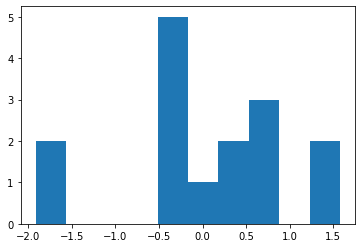

In [5]:
plt.hist(data)

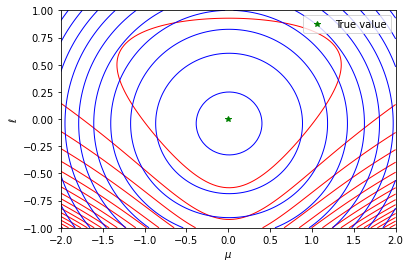

In [6]:
kwargs = {
    "func_kwargs": {"data": data},
    "x_range": 2,
    "y_range": 1,
}
contour_plot(
    [lambda inputs, data: true_log_posterior(*inputs.T, data)],
    contour_kwargs={
        "colors": "red",
        "levels": 20,
        "linestyles": "solid",
        "linewidths": 1,
    },
    **kwargs
)
contour_plot(
    [lambda inputs, data: laplace_approx(*inputs.T, data)],
    contour_kwargs={
        "colors": "blue",
        "levels": 10,
        "linestyles": "solid",
        "linewidths": 1,
    },
    **kwargs
)

plt.plot([0], [0], "g*", label="True value")
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\ell$")
plt.legend()
plt.savefig("../tex/img/gaussian-posterior-approx.png", dpi=400)